In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [8]:
diabetes.head()
# diabetes.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Normalize Columns Using Pandas

In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
normalize_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [10]:
diabetes[normalize_col] = diabetes[normalize_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [12]:
import tensorflow as tf

In [26]:
preg = tf.feature_column.numeric_column('Pregnancies')
glucose = tf.feature_column.numeric_column('Glucose')
blood_press = tf.feature_column.numeric_column('BloodPressure')
skin_thick = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

### Categorical Colums With Tensorflow

### groups = tf.feature_column.categorical_column_with_vocabulary_list('ColName',['list','of','possible','categories'])
### If unknown no of categories
### groups = tf.feature_column.categorical_column_with_hash_bucket('ColName',hash_bucket_size = estimate no of categories)

In [27]:
##Converting A Continuous Col to Categorical Col
import matplotlib.pyplot as plt
%matplotlib inline

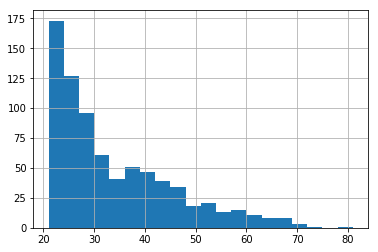

In [28]:
diabetes['Age'].hist(bins=20)

In [29]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [30]:
feature_cols = [preg , glucose , blood_press , skin_thick , insulin , bmi , diabetes_pedigree , age_bucket]

In [31]:
#Train Test Split
x_data = diabetes.drop('Outcome',axis=1)

In [33]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [35]:
labels = diabetes['Outcome']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [38]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train , y=y_train , batch_size=10 , num_epochs=1000 , shuffle=True)

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feature_cols ,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqk2_w7cx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2d755b30b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
model.train(input_fn=input_func,steps=100)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpqk2_w7cx/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmpqk2_w7cx/model.ckpt.
INFO:tensorflow:Loss for final step: 7.230833.


In [41]:
eval_inp = tf.estimator.inputs.pandas_input_fn(x=x_test , y=y_test , batch_size=10,num_epochs=1,shuffle=False)

In [42]:
results = model.evaluate(input_fn=eval_inp)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-16-09:56:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqk2_w7cx/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-16-09:56:03
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.7099567, accuracy_baseline = 0.64935064, auc = 0.760535, auc_precision_recall = 0.5995961, average_loss = 0.56251246, global_step = 100, label/mean = 0.35064936, loss = 5.4141827, precision = 0.62068963, prediction/mean = 0.35898906, recall = 0.44444445
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmpqk2_w7cx/model.ckpt-100


In [43]:
results

{'accuracy': 0.7099567,
 'accuracy_baseline': 0.64935064,
 'auc': 0.760535,
 'auc_precision_recall': 0.5995961,
 'average_loss': 0.56251246,
 'label/mean': 0.35064936,
 'loss': 5.4141827,
 'precision': 0.62068963,
 'prediction/mean': 0.35898906,
 'recall': 0.44444445,
 'global_step': 100}

In [44]:
pred_inp = tf.estimator.inputs.pandas_input_fn(x=x_test , batch_size=10 ,num_epochs=1 , shuffle=False)

In [45]:
predictions = list(model.predict(pred_inp))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqk2_w7cx/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [46]:
predictions

[{'logits': array([0.00482816], dtype=float32),
  'logistic': array([0.50120705], dtype=float32),
  'probabilities': array([0.49879298, 0.50120705], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.12972921], dtype=float32),
  'logistic': array([0.5323869], dtype=float32),
  'probabilities': array([0.4676131, 0.5323869], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.19504061], dtype=float32),
  'logistic': array([0.4513938], dtype=float32),
  'probabilities': array([0.54860616, 0.4513938 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.0334456], dtype=float32),
  'logistic': array([0.26241666], dtype=float32),
  'probabilities': array([0.7375834, 0.2624167], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.5270834], dtype=float32),
  'logistic': arr

In [47]:
#Neural Network Classifier
dnn_model =  tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feature_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4a7gdm81', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2d6416a518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
dnn_model.train(input_fn=input_func ,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp4a7gdm81/model.ckpt.
INFO:tensorflow:loss = 6.9266415, step = 1
INFO:tensorflow:global_step/sec: 171.459
INFO:tensorflow:loss = 5.634922, step = 101 (0.588 sec)
INFO:tensorflow:global_step/sec: 206.742
INFO:tensorflow:loss = 6.892112, step = 201 (0.498 sec)
INFO:tensorflow:global_step/sec: 119.918
INFO:tensorflow:loss = 4.898001, step = 301 (0.819 sec)
INFO:tensorflow:global_step/sec: 186.578
INFO:tensorflow:loss = 6.6874228, step = 401 (0.544 sec)
INFO:tensorflow:global_step/sec: 90.7915
INFO:tensorflow:loss = 7.3471313, step = 501 (1.089 sec)
INFO:tensorflow:global_step/sec: 234.311
INFO:tensorflow:loss = 3.0485144, step = 601 (0.429 sec)
INFO:tensorflow:global_step/sec: 261.868
INFO:tensorflow:los

In [50]:
#For Categorical Colums For DNN
# emb_cols = tf.feature_column.embedding_column(group,dimension=4)    

In [51]:
eval_dnn = tf.estimator.inputs.pandas_input_fn(x=x_test , y=y_test , batch_size=10 ,num_epochs=1 ,shuffle=False)

In [52]:
dnn_model.evaluate(eval_dnn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-16-10:11:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4a7gdm81/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-16-10:11:58
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8341152, auc_precision_recall = 0.7137902, average_loss = 0.48060733, global_step = 1000, label/mean = 0.35064936, loss = 4.6258454, precision = 0.7121212, prediction/mean = 0.33506256, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp4a7gdm81/model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8341152,
 'auc_precision_recall': 0.7137902,
 'average_loss': 0.48060733,
 'label/mean': 0.35064936,
 'loss': 4.6258454,
 'precision': 0.7121212,
 'prediction/mean': 0.33506256,
 'recall': 0.5802469,
 'global_step': 1000}